In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import os
import sys

In [2]:
im = plt.imread("../data_image/ballade2/ballade2_instrument_0_0.png")

In [3]:
im_t = np.transpose(im)
im_t.shape

(100, 106)

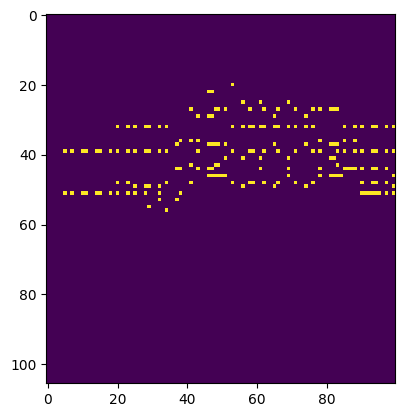

In [4]:
plt.imshow(im)

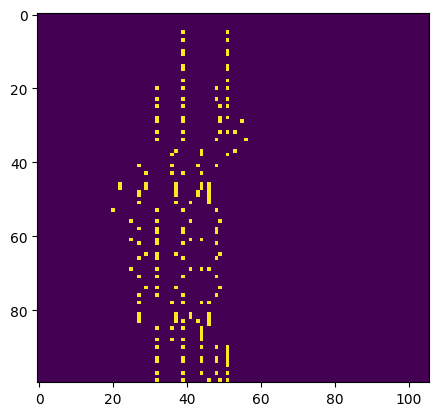

In [5]:
plt.imshow(im_t)

In [6]:
folder_list = [folder for folder in os.listdir("../data_image")]

In [7]:
len_max = 0 # Maximum number of images per music piece in dataset
for folder in folder_list:
    image_list = [image for image in os.listdir(f"../data_image/{folder}")]
    if len(image_list) > len_max :
        len_max = len(image_list)
        
len_max

75

In [8]:
X = np.zeros((len(folder_list), (len_max-1)*100, 106), dtype= float)
y = np.zeros((len(folder_list), 100, 106), dtype= float)
X.shape, y.shape

((88, 7400, 106), (88, 100, 106))

In [9]:
folder_names_list = []

In [10]:
for index_folder, folder in enumerate(folder_list):
    
    image_list = [image for image in os.listdir(f"../data_image/{folder}")]
    nb_images = len(image_list)
    folder_X = np.zeros(((len_max-1)*100, 106), dtype = float)
    
    for index_image, image in enumerate(image_list):
        image_array = np.transpose(plt.imread(f"../data_image/{folder}/{image}"))
        if index_image < (nb_images -1): 
            folder_X[index_image*100 : (index_image+1)*100, :] = image_array
        elif index_image == (nb_images-1):
            folder_y = image_array
            
X[index_folder, :, :] = folder_X
y[index_folder, :, :] = folder_y

print(X.shape, y.shape)

(88, 7400, 106) (88, 100, 106)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)